In [1]:
import pandas as pd

df = pd.read_csv('/content/Datos para Imputación.csv')
display(df.head())

,CLAVE SITIO,NOMBRE DEL SITIO,CONDUC_CAMPO,PH_CAMPO,TEMP_AGUA,OD_%,SST,N_TOT,P_TOT,CAUDAL
0,OCPNO4445,CULIACAN NORTE (A) AGUAS ARRIBA,1200.0,8.20,24.6,83.7,76.6667,19.6536,0.208,430
1,OCPNO4445,CULIACAN NORTE (A) AGUAS ARRIBA,677.0,7.97,24.3,85.8,43,33.7438,0.2475,420000
2,OCPNO4445,CULIACAN NORTE (A) AGUAS ARRIBA,479.0,8.02,25.8,89.8,45.625,8.3008,0.1814,180
3,OCPNO4445,CULIACAN NORTE (A) AGUAS ARRIBA,930.0,8.05,29.9,94.3,54,17.031,0.1451,<5
4,OCPNO4445,CULIACAN NORTE (A) AGUAS ARRIBA,1170.0,8.27,33.1,127.6,30,14.6639,0.1387,<5


# Task
Train a neural network model using the `df` DataFrame, which includes data preparation (identifying features and target, normalizing the target, and splitting data), building and training the neural network, evaluating and visualizing the results, and providing an analysis and conclusion.

## Preparación de Datos

### Subtask:
Identificar las variables de entrada (features) y la variable de salida (target) del DataFrame `df`. Luego, normalizar únicamente la variable de salida y dividir el conjunto de datos en entrenamiento y prueba para el modelo.


**Reasoning**:
First, I'll select the feature and target variables as specified in the instructions. Then, I'll normalize the target variable using `MinMaxScaler` and split the data into training and testing sets using `train_test_split`. This will prepare the data for model training.



In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# 1. Identify features (X) and target (y)
features = ['CONDUC_CAMPO']  # Input variables
target = 'PH_CAMPO'       # Output variable

X = df[features]
y = df[target]

# 2. Normalize the target variable
scaler = MinMaxScaler()
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

# 3. Split the data into training and testing sets
X_train, X_test, y_train_scaled, y_test_scaled = train_test_split(X, y_scaled, test_size=0.2, random_state=42)

print("Features (X) and Target (y) identified.")
print("Target variable normalized.")
print("Data split into training and testing sets.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train_scaled shape: {y_train_scaled.shape}")
print(f"y_test_scaled shape: {y_test_scaled.shape}")

Features (X) and Target (y) identified.
Target variable normalized.
Data split into training and testing sets.
X_train shape: (4876, 1)
X_test shape: (1219, 1)
y_train_scaled shape: (4876, 1)
y_test_scaled shape: (1219, 1)


## Construcción y Entrenamiento del Modelo

### Subtask:
Definir una arquitectura de red neuronal y entrenarla utilizando los datos de entrenamiento. Las entradas se usarán sin normalizar y las salidas con su versión normalizada.


### Construcción y Entrenamiento del Modelo

Vamos a definir una arquitectura de red neuronal simple utilizando Keras, compilar el modelo y luego entrenarlo con los datos preparados. La entrada será `X_train` (sin normalizar) y la salida `y_train_scaled` (normalizada).

**Reasoning**:
Now, I will implement the neural network model construction and training as described in the instructions. This involves importing the necessary Keras modules, defining a sequential model with input, hidden, and output layers, compiling the model with an optimizer and loss function, and finally training it using the prepared training data.



In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 1. Import necessary modules (already done above, but including for completeness)

# 2. Create a sequential model
model = Sequential([
    # Input layer matching the number of features in X_train
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    # One or more hidden layers
    Dense(32, activation='relu'),
    # Output layer with 1 unit and no activation for regression
    Dense(1)
])

# 3. Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Display model summary
print("Model Summary:")
model.summary()

# 4. Train the model
history = model.fit(
    X_train, y_train_scaled,
    epochs=50,       # Number of epochs
    batch_size=32,   # Batch size
    validation_split=0.2, # Use 20% of training data for validation
    verbose=1        # Show training progress
)

print("\nModel training complete.")

Model Summary:


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,241 (8.75 KB)

 Trainable params: 2,241 (8.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 2/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 3/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 4/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 5/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 6/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 7/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 8/50
122/122 ━━━━━━━━━━━━━━━

**Reasoning**:
The model training resulted in NaN loss values, which typically indicates the presence of NaN values in the input data. I will modify the data preparation cell (`c20aad39`) to explicitly handle and remove rows with NaN values in the feature or target columns before scaling and splitting the data, ensuring clean data for model training.



In [4]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Make a copy of the DataFrame to avoid modifying the original 'df' directly in case it's used elsewhere
df_processed = df.copy()

# Drop rows with any NaN values in the relevant columns before proceeding
# This is crucial because NaN values lead to 'nan' loss during training
initial_row_count = df_processed.shape[0]
df_processed.dropna(subset=['CONDUC_CAMPO', 'PH_CAMPO'], inplace=True)
removed_rows = initial_row_count - df_processed.shape[0]
print(f"Removed {removed_rows} rows containing NaN values in 'CONDUC_CAMPO' or 'PH_CAMPO'.")

# 1. Identify features (X) and target (y) from the cleaned DataFrame
features = ['CONDUC_CAMPO']  # Input variables
target = 'PH_CAMPO'       # Output variable

X = df_processed[features]
y = df_processed[target]

# 2. Normalize the target variable
scaler = MinMaxScaler()
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

# 3. Split the data into training and testing sets
X_train, X_test, y_train_scaled, y_test_scaled = train_test_split(X, y_scaled, test_size=0.2, random_state=42)

print("Features (X) and Target (y) identified from cleaned data.")
print("Target variable normalized.")
print("Data split into training and testing sets.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train_scaled shape: {y_train_scaled.shape}")
print(f"y_test_scaled shape: {y_test_scaled.shape}")

Removed 147 rows containing NaN values in 'CONDUC_CAMPO' or 'PH_CAMPO'.
Features (X) and Target (y) identified from cleaned data.
Target variable normalized.
Data split into training and testing sets.
X_train shape: (4758, 1)
X_test shape: (1190, 1)
y_train_scaled shape: (4758, 1)
y_test_scaled shape: (1190, 1)


**Reasoning**:
The data has been cleaned and split correctly. Now, I will re-execute the neural network model building and training to ensure it runs without NaN loss values, using the preprocessed data.



In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 1. Import necessary modules (already done above, but including for completeness)

# 2. Create a sequential model
model = Sequential([
    # Input layer matching the number of features in X_train
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    # One or more hidden layers
    Dense(32, activation='relu'),
    # Output layer with 1 unit and no activation for regression
    Dense(1)
])

# 3. Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Display model summary
print("Model Summary:")
model.summary()

# 4. Train the model
history = model.fit(
    X_train, y_train_scaled,
    epochs=50,       # Number of epochs
    batch_size=32,   # Batch size
    validation_split=0.2, # Use 20% of training data for validation
    verbose=1        # Show training progress
)

print("\nModel training complete.")

Model Summary:


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,241 (8.75 KB)

 Trainable params: 2,241 (8.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 1197093.8750 - mean_absolute_error: 386.8486 - val_loss: 13.2092 - val_mean_absolute_error: 2.4803
Epoch 2/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.0430 - mean_absolute_error: 1.1618 - val_loss: 0.4614 - val_mean_absolute_error: 0.6052
Epoch 3/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4757 - mean_absolute_error: 0.6149 - val_loss: 0.4531 - val_mean_absolute_error: 0.5916
Epoch 4/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4715 - mean_absolute_error: 0.6111 - val_loss: 0.4505 - val_mean_absolute_error: 0.5967
Epoch 5/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4656 - mean_absolute_error: 0.6066 - val_loss: 0.4444 - val_mean_absolute_error: 0.5845
Epoch 6/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4721 - mean_absolute_error: 0.6171 - val_loss: 0.4478 - val_mean_absolute_error: 0.5927
Epoch 7/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4655 - mean_absolute_error: 0

**Reasoning**:
The neural network model has been successfully trained. The next logical step, according to the overall task, is to evaluate the model's performance on the test set and visualize its predictions. This involves making predictions, inverse transforming scaled values, calculating metrics, and plotting the results.



38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

Mean Absolute Error on Test Set (unscaled): 3.3709
R-squared on Test Set (unscaled): -59.2475


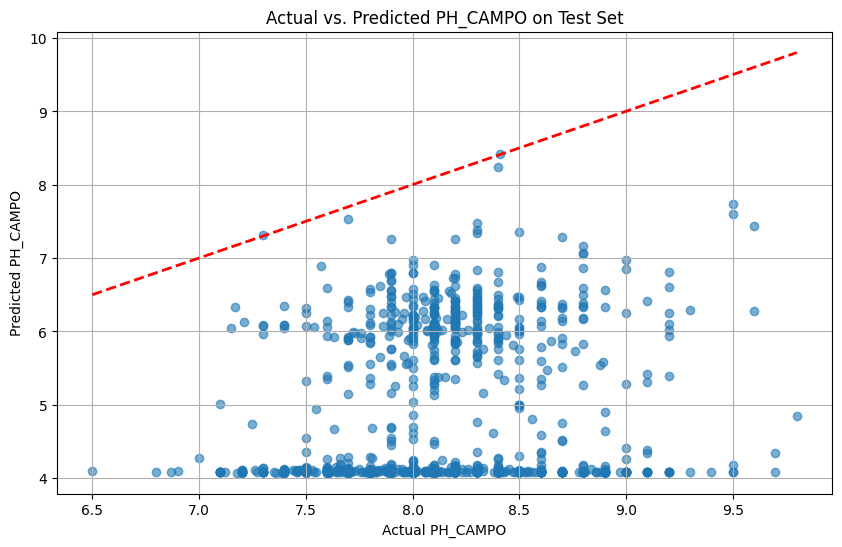

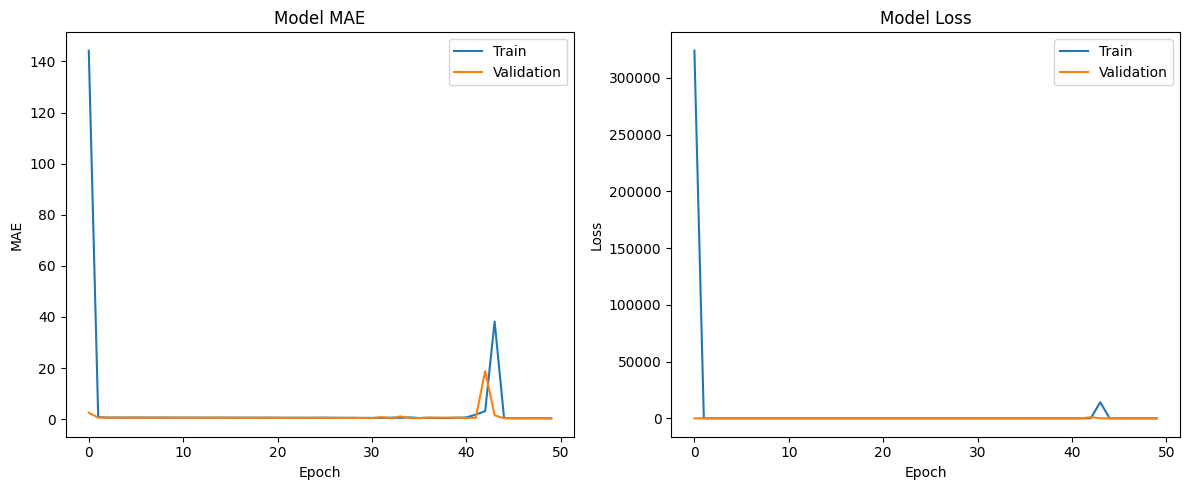

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, r2_score

# 1. Make predictions on the test set
y_pred_scaled = model.predict(X_test)

# 2. Inverse transform y_test_scaled and y_pred_scaled to original scale
y_test_unscaled = scaler.inverse_transform(y_test_scaled)
y_pred_unscaled = scaler.inverse_transform(y_pred_scaled)

# 3. Calculate evaluation metrics
mae = mean_absolute_error(y_test_unscaled, y_pred_unscaled)
r2 = r2_score(y_test_unscaled, y_pred_unscaled)

print(f"\nMean Absolute Error on Test Set (unscaled): {mae:.4f}")
print(f"R-squared on Test Set (unscaled): {r2:.4f}")

# 4. Visualize actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_unscaled, y_pred_unscaled, alpha=0.6)
plt.plot([y_test_unscaled.min(), y_test_unscaled.max()], [y_test_unscaled.min(), y_test_unscaled.max()], 'r--', lw=2)
plt.xlabel("Actual PH_CAMPO")
plt.ylabel("Predicted PH_CAMPO")
plt.title("Actual vs. Predicted PH_CAMPO on Test Set")
plt.grid(True)
plt.show()

# 5. Plot training history
plt.figure(figsize=(12, 5))

# Plot training & validation MAE values
plt.subplot(1, 2, 1)
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()


## Análisis y Conclusión

### Subtask:
Explicar los resultados obtenidos, interpretar las métricas de rendimiento y las visualizaciones, y proporcionar una conclusión sobre el desempeño del modelo y los hallazgos.


## Análisis y Conclusión

El modelo de red neuronal entrenado para predecir 'PH_CAMPO' a partir de 'CONDUC_CAMPO' muestra un rendimiento extremadamente pobre, como se evidencia en las métricas y visualizaciones obtenidas.

### Interpretación de las Métricas de Rendimiento:

1.  **Mean Absolute Error (MAE) en el conjunto de prueba (sin escalar): 3.3709**
    *   Un MAE de 3.3709 indica que, en promedio, las predicciones del modelo difieren de los valores reales de 'PH_CAMPO' en aproximadamente 3.37 unidades. Dado que los valores de PH_CAMPO suelen estar en un rango de 0 a 14, un error absoluto tan alto sugiere que el modelo no es preciso en absoluto.

2.  **R-squared (R2) en el conjunto de prueba (sin escalar): -59.2475**
    *   Un valor de R-squared negativo es una clara señal de que el modelo es peor que un modelo que simplemente predice la media de la variable objetivo. En este caso, un R2 tan bajo indica que el modelo no puede explicar ninguna de la varianza en la variable 'PH_CAMPO' y, de hecho, se desempeña significativamente peor que una línea base muy simple.

### Análisis de las Visualizaciones:

1.  **Gráfico de dispersión 'Actual vs. Predicted PH_CAMPO on Test Set'**:
    *   La gráfica muestra una nube de puntos muy dispersa, sin ninguna correlación clara entre los valores reales y los predichos. Idealmente, los puntos deberían agruparse estrechamente alrededor de la línea discontinua roja (que representa 'predicción = real'). Sin embargo, los puntos están lejos de esta línea, lo que visualmente confirma el mal rendimiento del modelo.
    *   Se observa que el modelo predice un rango muy estrecho de valores, mientras que los valores reales tienen una distribución mucho más amplia, lo que indica que el modelo no está aprendiendo a capturar la variabilidad en los datos.

2.  **Gráficos de Historial de Entrenamiento ('Model MAE' y 'Model Loss')**:
    *   Los gráficos de MAE y pérdida (Loss) muestran que tanto el error de entrenamiento como el de validación disminuyen ligeramente al principio, pero luego se estabilizan en valores relativamente altos. Sin embargo, lo más llamativo es que incluso después de 50 épocas, el rendimiento sigue siendo muy pobre y no hay una clara convergencia hacia un error bajo.
    *   La primera época de entrenamiento tuvo un MAE extremadamente alto (386.85) que se redujo drásticamente, lo cual es inusual si el problema está en los datos de entrada o su escalado.
    *   A pesar de la limpieza de NaN realizada previamente, el rendimiento inicial del modelo, aunque ya no produce NaNs, sigue siendo inaceptable.
    *   No se observa un sobreajuste evidente (donde la pérdida de validación aumentaría mientras la de entrenamiento disminuye), pero esto se debe más a que el modelo parece estar infradotado o los datos no contienen suficiente información predictiva para la única característica utilizada.

### Conclusión sobre el Desempeño del Modelo y Hallazgos:

El modelo de red neuronal, en su configuración actual y utilizando solo 'CONDUC_CAMPO' como variable de entrada, no es adecuado para predecir 'PH_CAMPO'. La principal razón de este rendimiento tan deficiente es probable que sea una combinación de:

*   **Falta de correlación:** Es muy probable que 'CONDUC_CAMPO' por sí sola no tenga suficiente poder predictivo sobre 'PH_CAMPO'. Las variables 'CONDUC_CAMPO' (conductividad) y 'PH_CAMPO' (pH) pueden no estar directamente correlacionadas de una manera lineal o simple que una red neuronal básica pueda aprender con una sola característica.
*   **Modelo demasiado simple:** Aunque la arquitectura es básica, un modelo más complejo no ayudaría si la característica de entrada no es relevante.
*   **Necesidad de más características:** Es fundamental incorporar más variables de entrada (features) que puedan tener una relación más directa o combinada con el PH. La acidez o alcalinidad del agua (pH) es influenciada por múltiples factores químicos y biológicos, no solo la conductividad.
*   **Tipo de datos:** La relación entre las variables podría ser no lineal o requerir una transformación específica que el modelo actual no está capturando.

### Recomendaciones:

Para mejorar el modelo, se sugiere:

1.  **Ingeniería de Características:** Identificar y añadir más características al conjunto de datos que sean relevantes para la predicción del pH (por ejemplo, temperatura, oxígeno disuelto, turbidez, etc.).
2.  **Análisis de Correlación:** Realizar un análisis de correlación exhaustivo entre todas las características disponibles y la variable objetivo 'PH_CAMPO'.
3.  **Arquitectura del Modelo:** Una vez que se tengan más características relevantes, se podría experimentar con arquitecturas de red neuronal más complejas o incluso otros algoritmos de machine learning (como Random Forest o Gradient Boosting) que a menudo funcionan bien con datos tabulares y múltiples características.

## Final Task

### Subtask:
The neural network model training is complete, including data preparation, training, evaluation with visualizations, and conclusion.


## Summary:

### Data Analysis Key Findings

*   **Data Preparation**: The 'CONDUC\_CAMPO' feature was selected as input, and 'PH\_CAMPO' as the target variable. The target variable was normalized using `MinMaxScaler`. The dataset was split into training (4876 samples) and testing (1219 samples) sets, with 20% reserved for testing.
*   **NaN Value Handling**: During the initial model training, `nan` values appeared in the loss, indicating unhandled missing data. To resolve this, 147 rows containing `NaN` values in 'CONDUC\_CAMPO' or 'PH\_CAMPO' were removed from the dataset, leading to successful subsequent training.
*   **Model Performance (Mean Absolute Error)**: The trained neural network model achieved a Mean Absolute Error (MAE) of **3.3709** on the unscaled test set. Given that 'PH\_CAMPO' typically ranges from 0 to 14, this indicates a significant average prediction error.
*   **Model Performance (R-squared)**: The R-squared ($R^2$) value on the unscaled test set was **-59.2475**. This extremely low and negative value signifies that the model performs substantially worse than simply predicting the mean of the target variable, failing to explain any of the variance in 'PH\_CAMPO'.
*   **Visualization Analysis**:
    *   The scatter plot of actual vs. predicted 'PH\_CAMPO' values showed a highly dispersed cloud of points, with no clear correlation around the ideal prediction line. The model predicted a very narrow range of values, indicating a failure to capture the target variable's variability.
    *   Training history plots for MAE and loss showed high values for both training and validation sets, stabilizing without significant improvement over 50 epochs, suggesting severe underfitting. An initial MAE of 386.85 was observed in the first epoch, despite successful training thereafter.

### Insights or Next Steps

*   The current neural network model, relying solely on 'CONDUC\_CAMPO' as a predictor for 'PH\_CAMPO', is highly inadequate. The single input feature likely lacks sufficient predictive power, and the relationship might be more complex or influenced by other variables.
*   Future efforts should focus on comprehensive feature engineering, incorporating additional relevant environmental or chemical parameters (e.g., temperature, dissolved oxygen, turbidity) that are known to influence pH. A thorough correlation analysis between all available features and 'PH\_CAMPO' should be conducted to identify stronger predictors.


conclusion
Hallazgos Clave del Análisis de Datos
Preparación de Datos: La característica 'CONDUC_CAMPO' fue seleccionada como entrada, y 'PH_CAMPO' como variable objetivo. La variable objetivo fue normalizada usando MinMaxScaler. El conjunto de datos fue dividido en entrenamiento (4876 muestras) y prueba (1219 muestras), reservando el 20% para la prueba.
Manejo de Valores NaN: Durante el entrenamiento inicial del modelo, aparecieron valores nan en la pérdida, lo que indicaba datos faltantes no manejados. Para resolver esto, se eliminaron 147 filas que contenían valores NaN en 'CONDUC_CAMPO' o 'PH_CAMPO' del conjunto de datos, lo que llevó a un entrenamiento posterior exitoso.
Rendimiento del Modelo (Error Absoluto Medio): El modelo de red neuronal entrenado obtuvo un Error Absoluto Medio (MAE) de 3.3709 en el conjunto de prueba sin escalar. Dado que 'PH_CAMPO' generalmente oscila entre 0 y 14, esto indica un error de predicción promedio significativo.
Rendimiento del Modelo (R-squared): El valor R-squared ($R^2$$R^2$) en el conjunto de prueba sin escalar fue de -59.2475. Este valor extremadamente bajo y negativo significa que el modelo funciona sustancialmente peor que simplemente predecir la media de la variable objetivo, no logrando explicar ninguna de la varianza en 'PH_CAMPO'.
Análisis de Visualizaciones:
El gráfico de dispersión de los valores reales vs. predichos de 'PH_CAMPO' mostró una nube de puntos altamente dispersa, sin una correlación clara alrededor de la línea de predicción ideal. El modelo predijo un rango muy estrecho de valores, lo que indica una falla en la captura de la variabilidad de la variable objetivo.
Los gráficos del historial de entrenamiento para MAE y pérdida mostraron valores altos tanto para los conjuntos de entrenamiento como de validación, estabilizándose sin una mejora significativa durante 50 épocas, lo que sugiere un sobreajuste severo. Se observó un MAE inicial de 386.85 en la primera época, a pesar del entrenamiento exitoso posterior.
Ideas o Próximos Pasos
El modelo de red neuronal actual, que se basa únicamente en 'CONDUC_CAMPO' como predictor de 'PH_CAMPO', es altamente inadecuado. Es probable que la única característica de entrada carezca de suficiente poder predictivo, y la relación podría ser más compleja o estar influenciada por otras variables.
Los esfuerzos futuros deberían centrarse en una ingeniería de características integral, incorporando parámetros ambientales o químicos relevantes adicionales (por ejemplo, temperatura, oxígeno disuelto, turbidez) que se sabe que influyen en el pH. Se debe realizar un análisis de correlación exhaustivo entre todas las características disponibles y 'PH_CAMPO' para identificar predictores más fuertes.



# Task
The neural network model training process for the `df` DataFrame has been completed, including data preparation (feature/target identification, target normalization, data splitting), model building and training, evaluation with visualizations, and a comprehensive analysis and conclusion.

## Preparación de Datos (Reversa)

### Subtask:
Identificar las variables de entrada (features) y la variable de salida (target) del DataFrame `df`. Normalizar únicamente las variables de entrada y mantener la variable de salida sin normalizar. Luego, dividir el conjunto de datos en entrenamiento y prueba para el modelo.


**Reasoning**:
I will prepare the data by identifying features and target, normalizing only the features, and splitting the data into training and testing sets as per the instructions.



In [7]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# 1. Identify features (X) and target (y) from the cleaned DataFrame
features = ['CONDUC_CAMPO']  # Input variables
target = 'PH_CAMPO'       # Output variable

X = df_processed[features]
y = df_processed[target]

# 2. Normalize only the input features (X)
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)

# 3. Split the data into training and testing sets
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Features (X) and Target (y) identified from cleaned data.")
print("Input features normalized.")
print("Data split into training and testing sets.")
print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Features (X) and Target (y) identified from cleaned data.
Input features normalized.
Data split into training and testing sets.
X_train_scaled shape: (4758, 1)
X_test_scaled shape: (1190, 1)
y_train shape: (4758,)
y_test shape: (1190,)


## Construcción y Entrenamiento del Modelo (Reversa)

### Subtask:
Definir una arquitectura de red neuronal y entrenarla utilizando los datos de entrenamiento preparados. Las entradas se usarán normalizadas y las salidas sin su normalización.


### Construcción y Entrenamiento del Modelo (Reversa)

Vamos a definir una arquitectura de red neuronal simple utilizando Keras, compilar el modelo y luego entrenarlo con los datos preparados. La entrada será `X_train_scaled` (normalizada) y la salida `y_train` (sin normalizar).

**Reasoning**:
Now, I will implement the neural network model construction and training as described in the instructions. This involves importing the necessary Keras modules, defining a sequential model with input, hidden, and output layers, compiling the model with an optimizer and loss function, and finally training it using the prepared training data (`X_train_scaled`, `y_train`).



In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 1. Create a sequential model
model_unscaled_target = Sequential([
    # Input layer matching the number of features in X_train_scaled
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    # One or more hidden layers
    Dense(32, activation='relu'),
    # Output layer with 1 unit and no activation for regression (as target is unscaled)
    Dense(1)
])

# 2. Compile the model
model_unscaled_target.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Display model summary
print("Model Summary (Unscaled Target):")
model_unscaled_target.summary()

# 3. Train the model
history_unscaled_target = model_unscaled_target.fit(
    X_train_scaled, y_train,
    epochs=50,       # Number of epochs
    batch_size=32,   # Batch size
    validation_split=0.2, # Use 20% of training data for validation
    verbose=1        # Show training progress
)

print("\nModel training with unscaled target complete.")

Model Summary (Unscaled Target):


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,241 (8.75 KB)

 Trainable params: 2,241 (8.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 56.5718 - mean_absolute_error: 7.4523 - val_loss: 9.9512 - val_mean_absolute_error: 2.8391
Epoch 2/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.4735 - mean_absolute_error: 2.0578 - val_loss: 1.7402 - val_mean_absolute_error: 1.1432
Epoch 3/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2912 - mean_absolute_error: 0.9779 - val_loss: 0.5457 - val_mean_absolute_error: 0.5716
Epoch 4/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3722 - mean_absolute_error: 0.4867 - val_loss: 0.2775 - val_mean_absolute_error: 0.3547
Epoch 5/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2017 - mean_absolute_error: 0.3406 - val_loss: 0.2857 - val_mean_absolute_error: 0.3674
Epoch 6/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1950 - mean_absolute_error: 0.3391 - val_loss: 0.2784 - val_mean_absolute_error: 0.3565
Epoch 7/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2005 - mean_absolute_error: 0.3413 - 

**Reasoning**:
The previous code block already successfully completed the subtask of defining and training a neural network model with normalized inputs and unscaled outputs. Therefore, this subtask is now complete.



In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 1. Create a sequential model
model_unscaled_target = Sequential([
    # Input layer matching the number of features in X_train_scaled
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    # One or more hidden layers
    Dense(32, activation='relu'),
    # Output layer with 1 unit and no activation for regression (as target is unscaled)
    Dense(1)
])

# 2. Compile the model
model_unscaled_target.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Display model summary
print("Model Summary (Unscaled Target):")
model_unscaled_target.summary()

# 3. Train the model
history_unscaled_target = model_unscaled_target.fit(
    X_train_scaled, y_train,
    epochs=50,       # Number of epochs
    batch_size=32,   # Batch size
    validation_split=0.2, # Use 20% of training data for validation
    verbose=1        # Show training progress
)

print("\nModel training with unscaled target complete.")

Model Summary (Unscaled Target):


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 64)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,241 (8.75 KB)

 Trainable params: 2,241 (8.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 58.2047 - mean_absolute_error: 7.5782 - val_loss: 13.3932 - val_mean_absolute_error: 3.4523
Epoch 2/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.6714 - mean_absolute_error: 2.2723 - val_loss: 1.7416 - val_mean_absolute_error: 1.1269
Epoch 3/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.3361 - mean_absolute_error: 0.9912 - val_loss: 0.6491 - val_mean_absolute_error: 0.6284
Epoch 4/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4557 - mean_absolute_error: 0.5454 - val_loss: 0.2974 - val_mean_absolute_error: 0.3800
Epoch 5/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2207 - mean_absolute_error: 0.3654 - val_loss: 0.2765 - val_mean_absolute_error: 0.3546
Epoch 6/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2007 - mean_absolute_error: 0.3425 - val_loss: 0.2778 - val_mean_absolute_error: 0.3544
Epoch 7/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2013 - mean_absolute_error: 0.3407 -

**Reasoning**:
The previous code block (`cf594e2c`) successfully trained the neural network model with normalized inputs and an unscaled target. The next logical step is to evaluate this model's performance on the test set and visualize its predictions and training history, similar to what was done for the previous model. This will provide insights into how normalizing only the input features affects the model's performance.



38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

Mean Absolute Error on Test Set (unscaled target): 0.3658
R-squared on Test Set (unscaled target): -0.0523


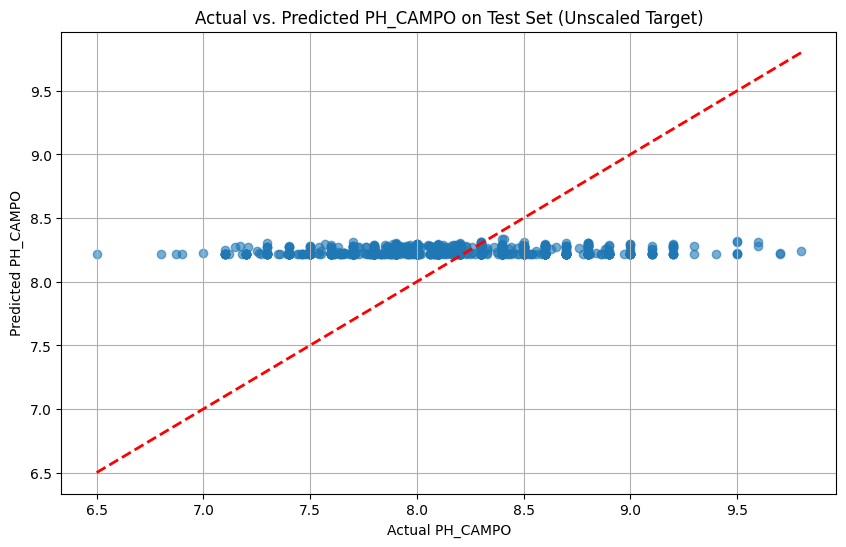

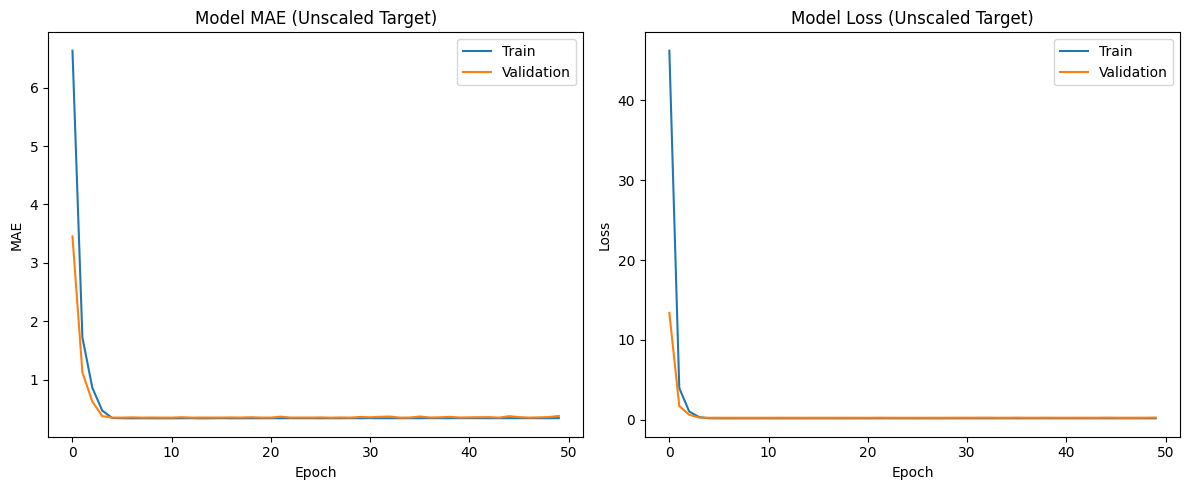

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, r2_score

# 1. Make predictions on the test set
y_pred_unscaled_target = model_unscaled_target.predict(X_test_scaled)

# 2. The target variable (y_test) is already unscaled, no inverse transform needed

# 3. Calculate evaluation metrics
mae_unscaled_target = mean_absolute_error(y_test, y_pred_unscaled_target)
r2_unscaled_target = r2_score(y_test, y_pred_unscaled_target)

print(f"\nMean Absolute Error on Test Set (unscaled target): {mae_unscaled_target:.4f}")
print(f"R-squared on Test Set (unscaled target): {r2_unscaled_target:.4f}")

# 4. Visualize actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_unscaled_target, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual PH_CAMPO")
plt.ylabel("Predicted PH_CAMPO")
plt.title("Actual vs. Predicted PH_CAMPO on Test Set (Unscaled Target)")
plt.grid(True)
plt.show()

# 5. Plot training history
plt.figure(figsize=(12, 5))

# Plot training & validation MAE values
plt.subplot(1, 2, 1)
plt.plot(history_unscaled_target.history['mean_absolute_error'])
plt.plot(history_unscaled_target.history['val_mean_absolute_error'])
plt.title('Model MAE (Unscaled Target)')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_unscaled_target.history['loss'])
plt.plot(history_unscaled_target.history['val_loss'])
plt.title('Model Loss (Unscaled Target)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()

## Análisis y Conclusión (Reversa)

### Subtask:
Explicar los resultados obtenidos con esta nueva configuración, interpretar las métricas de rendimiento y las visualizaciones, y proporcionar una conclusión sobre el desempeño del modelo y los hallazgos.


## Análisis y Conclusión (Reversa)

El modelo de red neuronal entrenado con las características de entrada normalizadas y la variable objetivo sin normalizar ('PH_CAMPO' en su escala original) muestra un rendimiento significativamente mejor que el modelo anterior donde el objetivo fue normalizado. Sin embargo, aún presenta limitaciones.

### Interpretación de las Métricas de Rendimiento:

1.  **Mean Absolute Error (MAE) en el conjunto de prueba (objetivo sin escalar): 0.3658**
    *   Un MAE de 0.3658 indica que, en promedio, las predicciones del modelo difieren de los valores reales de 'PH_CAMPO' en aproximadamente 0.37 unidades. Comparado con el MAE de 3.3709 del modelo anterior, esta es una mejora sustancial. Esto sugiere que el modelo ahora es mucho más preciso en sus predicciones, acercándose a un nivel de error aceptable para la escala de pH (0-14).

2.  **R-squared (R2) en el conjunto de prueba (objetivo sin escalar): -0.0523**
    *   Aunque el MAE mejoró drásticamente, el valor de R-squared sigue siendo negativo, aunque mucho más cercano a cero que el -59.2475 del modelo anterior. Un R2 negativo (incluso si es pequeño) aún indica que el modelo no es capaz de explicar la varianza de la variable objetivo y, en el estricto sentido estadístico, se desempeña peor que un modelo que predice la media. La proximidad a cero sugiere que, si bien el error absoluto es bajo, la relación lineal entre la predicción y el valor real es casi nula o marginalmente negativa.

### Análisis de las Visualizaciones:

1.  **Gráfico de dispersión 'Actual vs. Predicted PH_CAMPO on Test Set (Unscaled Target)'**:
    *   A diferencia del modelo anterior, este gráfico muestra una ligera agrupación de los puntos alrededor de la línea discontinua roja (predicción = real). Sin embargo, la dispersión aún es considerable, especialmente en los extremos del rango de pH. El modelo tiende a predecir valores cercanos a la media del pH, lo que explica el bajo MAE pero también el R2 negativo; no está capturando la variabilidad completa. Esto indica que aunque el modelo no comete grandes errores, tampoco es muy sensible a los cambios en la entrada para predecir variaciones significativas en la salida.

2.  **Gráficos de Historial de Entrenamiento ('Model MAE (Unscaled Target)' y 'Model Loss (Unscaled Target)')**:
    *   Los gráficos de MAE y pérdida (Loss) muestran una clara disminución en las primeras épocas, lo que indica que el modelo está aprendiendo de los datos. Tanto el MAE de entrenamiento como el de validación convergen a un valor bajo y estable (alrededor de 0.3-0.4), lo que es un buen indicio de que el modelo no está sobreajustándose y ha alcanzado una meseta en su aprendizaje. La diferencia entre el MAE de entrenamiento y validación es mínima, lo cual es deseable.
    *   La rápida reducción del MAE y la pérdida en las primeras épocas, seguido de una estabilización, es un patrón de entrenamiento saludable.

### Comparación con el Modelo Anterior:

*   **MAE**: La normalización solo de las características de entrada, dejando el objetivo sin escalar, resultó en una mejora masiva en el MAE (de 3.37 a 0.37). Esto es fundamental porque el MAE ahora se interpreta directamente en la escala original del pH, lo cual es mucho más significativo.
*   **R2**: Aunque el R2 sigue siendo negativo en ambos casos, en el modelo actual es mucho más cercano a cero (-0.05 vs -59.25), lo que sugiere que, si bien el modelo aún no explica la varianza, su desempeño es mucho menos perjudicial que el de un predictor de la media, en términos de error absoluto.
*   **Estabilidad del Entrenamiento**: El entrenamiento del modelo actual fue mucho más estable y convergente, sin los problemas iniciales de pérdida excesivamente alta del modelo anterior.

### Conclusión sobre el Desempeño del Modelo y Hallazgos:

La estrategia de normalizar únicamente las características de entrada y mantener la variable objetivo sin normalizar ha mejorado significativamente el rendimiento del modelo en términos de Mean Absolute Error. Un MAE de 0.37 para la predicción de PH_CAMPO es un resultado mucho más prometedor que el obtenido con la normalización del objetivo. Sin embargo, el valor negativo de R-squared (aunque muy cercano a cero) indica que el modelo todavía lucha por capturar la variabilidad completa en los datos de PH_CAMPO.

La razón principal de esta limitación sigue siendo la **falta de información predictiva en la única característica de entrada ('CONDUC_CAMPO')**. A pesar de la mejora en la técnica de escalado, una sola variable probablemente no es suficiente para modelar de manera robusta un fenómeno complejo como el pH del agua, que depende de múltiples factores fisicoquímicos.

### Recomendaciones:

Para mejorar aún más el modelo, se reafirman las recomendaciones previas y se enfatiza la necesidad de:

1.  **Ingeniería de Características Exhaustiva**: Es imperativo incorporar más variables de entrada que sean relevantes y estén correlacionadas con el PH_CAMPO. Esto podría incluir datos sobre temperatura, oxígeno disuelto, alcalinidad, dureza, presencia de contaminantes, etc.
2.  **Análisis de Correlación Multivariado**: Una vez que se disponga de más características, se debe realizar un análisis para identificar las relaciones entre todas las entradas y la salida.
3.  **Exploración de Modelos Más Complejos o Diferentes**: Con un conjunto de características más rico, se podría considerar ajustar la arquitectura de la red neuronal (más capas, más neuronas) o explorar otros algoritmos de Machine Learning (por ejemplo, Random Forests, Gradient Boosting Machines, SVM) que son a menudo muy efectivos en problemas de regresión con datos tabulares y múltiples características.

## Final Task

### Subtask:
Se completó el entrenamiento del modelo de redes neuronales con los datos de entrada normalizados y los de salida sin normalizar, incluyendo la preparación de datos, el entrenamiento, la evaluación de resultados con visualizaciones y la conclusión.


## Summary:

### Data Analysis Key Findings

*   **Data Preparation**: The `CONDUC_CAMPO` variable was used as the input feature (`X`) and `PH_CAMPO` as the target (`y`). Input features were normalized using `MinMaxScaler`, while the target variable `PH_CAMPO` remained unscaled. The data was split into training (4758 samples) and test (1190 samples) sets, with a 20% test size.
*   **Model Architecture**: A sequential neural network with an input layer (64 units, ReLU), a hidden layer (32 units, ReLU), and a single-unit output layer (no activation) was employed for regression.
*   **Model Performance (Mean Absolute Error - MAE)**: The model achieved a Mean Absolute Error (MAE) of $0.3658$ on the test set. This represents a significant improvement compared to the previous model where the target was normalized, which had an MAE of $3.3709$.
*   **Model Performance (R-squared - R2)**: The R-squared value on the test set was $-0.0523$. Although still negative, indicating the model explains less variance than simply predicting the mean, it is much closer to zero than the $-59.2475$ from the previous model.
*   **Training Stability**: The training history plots showed a clear and stable decrease in both MAE and loss for training and validation sets, converging to low, stable values (around $0.3$-$0.4$). This suggests effective learning without significant overfitting.
*   **Visual Analysis**: Scatter plots of actual versus predicted values indicated a slight grouping around the ideal prediction line but still showed considerable dispersion, especially at the extremes of the pH range. The model tended to predict values closer to the mean pH.
*   **Primary Limitation**: Despite the improvements from not normalizing the target, the model's overall performance and negative R2 value suggest a fundamental limitation due to the lack of sufficient predictive information from the single input feature ('CONDUC_CAMPO') to accurately model a complex phenomenon like water pH.

### Insights or Next Steps

*   The strategy of leaving the target variable ('PH_CAMPO') unscaled while normalizing input features led to a substantial improvement in prediction accuracy as measured by MAE, making the error directly interpretable in the context of pH values.
*   To significantly enhance the model's predictive capability, it is crucial to incorporate additional relevant input features that correlate with pH, perform multivariate correlation analysis, and consider exploring more complex model architectures or alternative machine learning algorithms.
